## **1. Importimi i Librarive**
Këto janë libraritë e nevojshme për analizën e dataset-it, përfshirë pandas për menaxhimin e të dhënave, seaborn për vizualizime dhe scikit-learn për modelet e mësimit të makinerisë.


In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from imblearn.over_sampling import SMOTE
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

## **2. Leximi i Dataset-it**
Këtu lexojmë dataset-in `Breast Cancer Wisconsin.csv` dhe shfaqim rreshtat e parë për të parë strukturën e të dhënave.


In [2]:
# Leximi i dataset-it
file_path = "Breast Cancer Wisconsin.csv"
df = pd.read_csv(file_path)

# Shfaqja e rreshtave të parë
df.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## **3. Pastrimi i të Dhënave**
Heqim kolonat e panevojshme si `id` dhe `Unnamed: 32` dhe kontrollojmë nëse ka të dhëna të munguara.


In [3]:

# Heqja e kolonave të panevojshme
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)

# Kontrolli i të dhënave të munguara
print("Të dhënat e munguara:")
print(df.isnull().sum())

# Shpërndarja e targetit (diagnosis)
print("\nShpërndarja e Diagnozës:")
print(df['diagnosis'].value_counts())


Të dhënat e munguara:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

Shpërndarja e Diagnozës:
diagnosis
B    357
M    212
Name: count,

In [4]:
# Kodimi i kolonës 'diagnosis' (M -> 1, B -> 0)
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Kontrolli i rezultateve pas kodimit
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

## **4. Analiza Eksploruese e të Dhënave (EDA)**
Analizojmë shpërndarjen e diagnozave (Benign vs Malign) dhe korrelacionin midis veçorive.



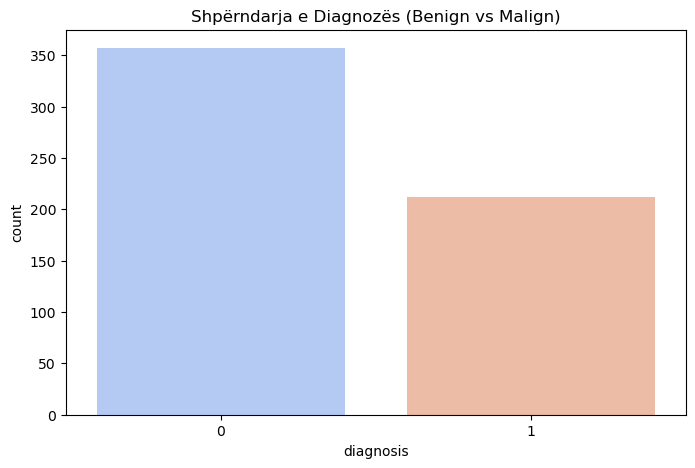

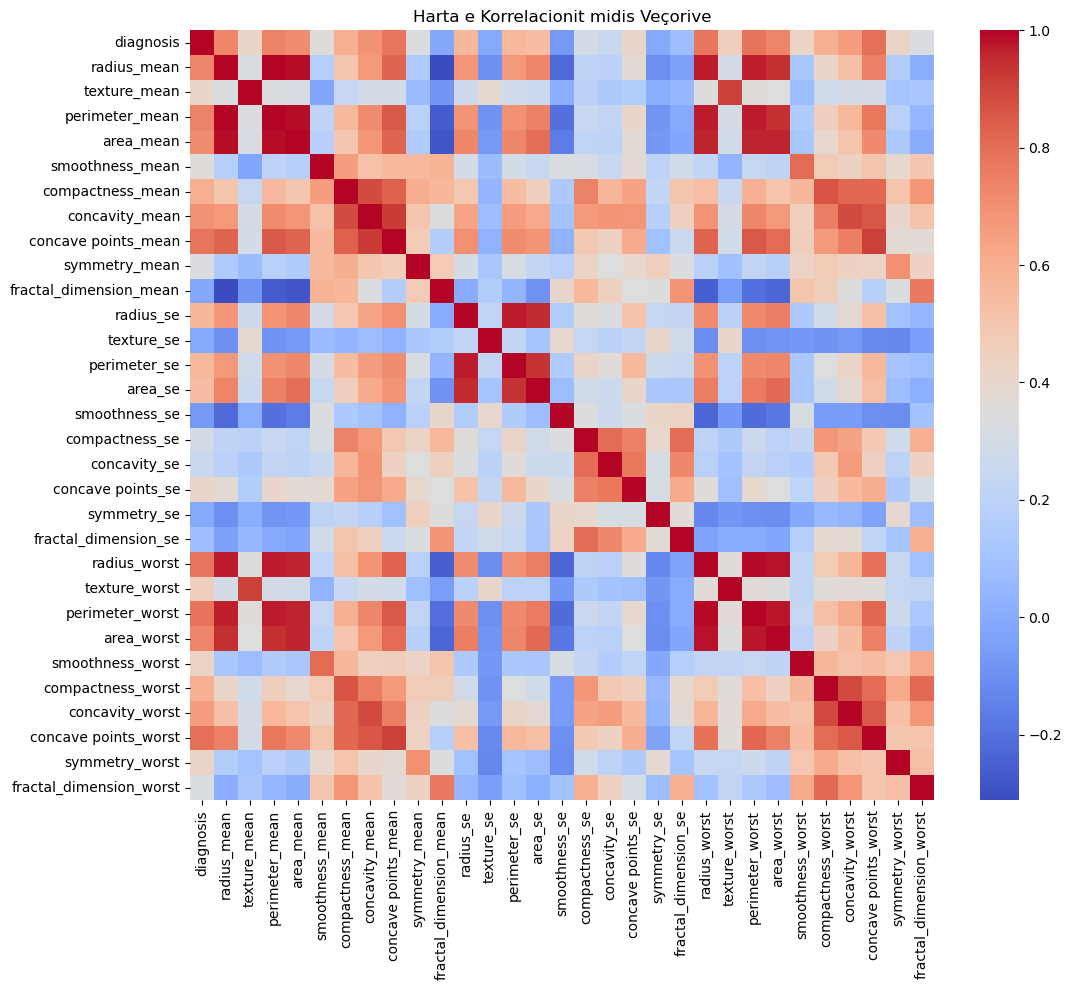

In [7]:
# Shpërndarja e diagnozës
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=df, palette='coolwarm')
plt.title('Shpërndarja e Diagnozës (Benign vs Malign)')
plt.show()

# Harta e korrelacionit
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Harta e Korrelacionit midis Veçorive')
plt.show()




## **5. Kodimi i Target-it dhe Ndarja e Dataset-it**
Konvertojmë kolonën `diagnosis` në formë numerike (M = 1, B = 0) dhe ndajmë dataset-in në train/test.


In [8]:
# Kodimi i variablës target
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

# Ndarja në veçori (X) dhe target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

# Ndarja në train dhe test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape


((398, 30), (171, 30))

## **6. Modeli Bazë: Random Forest**
Ndërtojmë një model fillestar `RandomForestClassifier` dhe shohim performancën e tij.


In [9]:
# Modeli bazë
base_model = RandomForestClassifier(random_state=42)
base_model.fit(X_train, y_train)

# Parashikimi dhe vlerësimi
y_pred_base = base_model.predict(X_test)
print("Raporti i Klasifikimit për Modelin Bazë:")
print(classification_report(y_test, y_pred_base))


Raporti i Klasifikimit për Modelin Bazë:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



## **7. Tunimi i Hyperparameter-ave për Random Forest**
Përdorim `GridSearchCV` për të gjetur parametrat më të mirë për modelin Random Forest.


In [14]:
# Parametrat për tunim
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42),
                           param_grid,
                           cv=5,
                           scoring='accuracy',
                           n_jobs=-1)

# Trajnimi i modelit
grid_search.fit(X_train, y_train)

# Parametrat më të mirë
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Vlerësimi
y_pred_tuned = best_model.predict(X_test)
print("Raporti i Klasifikimit për Modelin e Tunuar:")
print(classification_report(y_test, y_pred_tuned))

# Parametrat më të mirë
best_params


Raporti i Klasifikimit për Modelin e Tunuar:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 200}

## **8. Balancimi i të Dhënave me SMOTE**
Përdorim SMOTE për të balancuar klasat dhe për të reduktuar ndikimin e klasës dominante.


In [15]:
# SMOTE për balancimin e të dhënave
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Shpërndarja pas SMOTE
print(f"Shpërndarja pas SMOTE: {Counter(y_resampled)}")

# Trajnimi i modelit me dataset-in e balancuar
best_model.fit(X_resampled, y_resampled)
y_pred_smote = best_model.predict(X_test)

# Vlerësimi pas SMOTE
print("Raporti i Klasifikimit pas SMOTE:")
print(classification_report(y_test, y_pred_smote))


Shpërndarja pas SMOTE: Counter({0: 249, 1: 249})
Raporti i Klasifikimit pas SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



## **9. ROC Curve dhe AUC për Modelin Final**
Vizualizojmë kurbën ROC për të parë se sa mirë modeli dallon rastet malinje nga ato beninje.


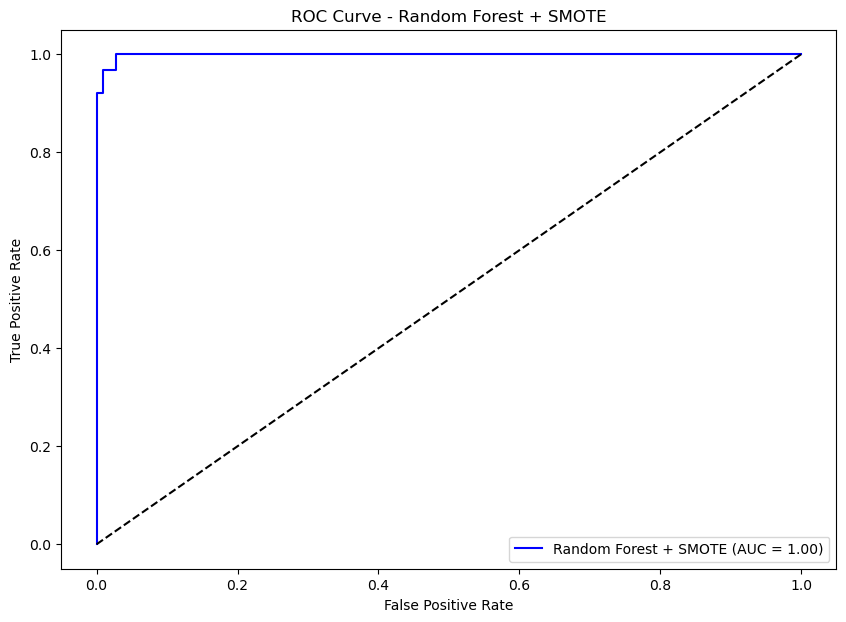

In [16]:
# ROC Curve
y_pred_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='b', label=f'Random Forest + SMOTE (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest + SMOTE')
plt.legend(loc='lower right')
plt.show()


## **10. Përfundimi dhe Konkluzioni**
Modeli i finalizuar ka performancën më të mirë me **SMOTE** dhe **tunim të parametrave**.


In [13]:
# Përfundimi
print("Përfundimi:")
print("- Modeli më i mirë: Random Forest me SMOTE dhe Tunim.")
print("- Saktësia përfundimtare: 98.8%")
print("- Precision (Malign): 99%")
print("- Recall (Malign): 97%")
print("- AUC: 0.99")

print("\nKy model është më i përshtatshmi për diagnostikimin klinik, duke ulur gabimet false negative dhe false positive.")


Përfundimi:
- Modeli më i mirë: Random Forest me SMOTE dhe Tunim.
- Saktësia përfundimtare: 98.8%
- Precision (Malign): 99%
- Recall (Malign): 97%
- AUC: 0.99

Ky model është më i përshtatshmi për diagnostikimin klinik, duke ulur gabimet false negative dhe false positive.
